<h1 style="align: center;"><img style="display: inline;" src="https://raw.githubusercontent.com/pangeo-data/branding/master/logo/v_small_pangeo_logo.png"> ❤️ SWOT</h1>

## Data Intensive Oceanography with Pangeo and Applications to the SWOT Mission

**<https://github.com/rabernat/pangeo-osn-demo>**

[![Binder](https://mybinder.org/badge_logo.svg)](https://binder.pangeo.io/v2/gh/rabernat/pangeo-osn-demo/34e294b/?urlpath=git-pull?repo=https://github.com/rabernat/pangeo-osn-demo%26amp%3Bbranch=main%26amp%3Burlpath=tree/pangeo-osn-demo/osn_pangeo.ipynb)

Funding:
- NASA SWOT Science Team
- NSF Award ICER-2026932



In [22]:
# run before executing to fix the coordinates error
# https://github.com/holoviz/hvplot/issues/603
import warnings
warnings.simplefilter("ignore")
import numpy as np
import xarray as xr
import hvplot.xarray
from dask.diagnostics import ProgressBar
from IPython.display import IFrame
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
import xarray as xr
import intake

In [5]:
catalog = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
url = "https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60/Region01/surface_hourly/fma.zarr"
ds_enatl = xr.open_zarr(url, consolidated=True)
ds_enatl = ds_enatl.assign_coords({'x': ('x', np.arange(len(ds_enatl.x))),
                       'y': ('y', np.arange(len(ds_enatl.y)))})

Much of what I am going to say is here: 

R. P. Abernathey et al., "Cloud-Native Repositories for Big Scientific Data," in Computing in Science & Engineering, vol. 23, no. 2, pp. 26-35, 1 March-April 2021. **<https://doi.org/10.1109/MCSE.2021.3059437>**

<img width="60%" src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/ieee_paper_header.png">

And here:

Gentemann, C. L., Holdgraf, C., Abernathey, R., Crichton, D., Colliander, J., Kearns, E. J., et al. (2021). _Science storms the cloud_. AGU Advances, 2, e2020AV000354. **<https://doi.org/10.1029/2020AV000354>**

<img width="60%" src="https://agupubs.onlinelibrary.wiley.com/cms/asset/af40765f-2449-4e89-9cad-327799aba1cb/aga220084-fig-0001-m.jpg">

# Outline

1. Motivation: SWOT Big Data
2. Pangeo in General
   - Community
   - Software
   - Infrastructure
3. Pangeo for SWOT
   - Cloud-based data and computing
   - Adopt-a-Crossover
   - Computational tools

# MITgcm LLC4320: My Gateway to Big Data

<http://maps.actualscience.net/MITgcm_llc_maps/llc_4320/>

<img style="float: right;" src="https://media.giphy.com/media/swtiK9jRfE0zS/giphy.gif">

- Dataset came out in 2014: I immediately decided this was going to be the future of oceanography (or at least my own career!)
- So much potential for scientific discovery in global-scale, super-high-res models
- Problem: it was so much easier to _run the model_ than it is to _analyze the data_
- The scale of the data (> 1 PB) brought out the gaps in our infrastructure and overall approach to data-intensive oceanography

# Nasa Earth Observation Data
The same challenge applies to remote sensing in general!

<img width="50%" src="https://cdn.earthdata.nasa.gov/conduit/upload/12979/EOSDISDataSize.jpg">

<https://earthdata.nasa.gov/eosdis/cloud-evolution>

Acceleration driven mostly by SWOT + NISAR.

# High-Energy Physics, Astronomy, Genomics, Bioimaging, ...

Actually, _most scientific fields have some version of this problem!_

In [20]:
IFrame("https://www.youtube.com/embed/aKlO35ZMfLQ?start=4", width=900, height=550)

<img src="https://raw.githubusercontent.com/pangeo-data/branding/master/logo/v_small_pangeo_logo.png">

## <http://pangeo.io>

<img class="float-right" style="float: right;" width="50%" src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/pangeo_logos.png">

- Grass-roots collaboration between environmental scientists, software developers around open-source tools for
  - big data processing
  - visualization
  - machine learning
- International partners, industry connections
- Funding support from NSF EarthCube, NASA Access, Gordon & Betty Moore Foundation
- _New: program support from Consortium for Ocean Leadershiop_ 🎉 

# Pangeo Community

<img class="float-right" alt="photo credit Alice Marzocchi via https://twitter.com/allygully/status/1229551346820493312" style="float: right;" width="40%" src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/pangeo_tutorial_OSM20_Marzocchi.png">



- Founded in 2017
- Specific technologies come and go: the foundation of Pangeo is a community of scientists / developers committed to improving tools and infrastructure to drive scientific progress
- Weekly [seminar series](https://pangeo.io/pangeo-showcase.html)
- [Discourse Forum](https://discourse.pangeo.io/)
- GitHub Organizations: [Pangeo](https://github.com/pangeo-data/), [Pangeo Gallery](https://github.com/pangeo-gallery/), [Pangeo Forge](https://github.com/pangeo-forge/)
- **No slack!** 😆 Slack is not open, searchable, discoverable. Knoweldge is shared among an "in crowd." We prefer open communication over back channels.
- Strive for diversity and inclusivity ([code of conduct](https://github.com/pangeo-data/governance/blob/master/conduct/code_of_conduct.md))


# [Pangeo Showcase](https://pangeo.io/pangeo-showcase.html)

### Upcoming

- 2021-05-19 12pm EDT - **Chelle Gentemann, Farallon Institute** - Sea Surface Temperature Datasets on the Cloud


### Past

- 2021-04-07 12PM EDT - **Seth McGinnis, NCAR**  [Parallel Analysis Using Pangeo vs the Command-Line](https://discourse.pangeo.io/t/april-7-2021-parallel-analysis-using-pangeo-vs-the-command-line/1373)
- 2021-04-14 4pm EDT - **Lais Carvalho, QuanSight** [The New Qhub 0.3: An easy way to deploy/maintain JupyterHub with Dask Gateway](https://discourse.pangeo.io/t/april-14-2021-the-new-qhub-0-3-an-easy-way-to-deploy-maintain-jupyterhub-with-dask-gateway/1399)
- 2021-04-21 12pm EDT - **Benoît Bovy, GFZ-Potsdam** [Build, customize and run models with Xarray-Simlab](https://discourse.pangeo.io/t/april-21-2021-build-customize-and-run-models-with-xarray-simlab/1417) 
- 2021-04-28 4pm EDT - **David Huard, Ouranos** [FAIR Climate Services using the Xarray ecosystem and OGC Standards](https://discourse.pangeo.io/t/april-28-2021-fair-climate-services-using-the-xarray-ecosystem-and-ogc-standards/1431)
- 2021-05-05 12pm EDT - **Philip Austin, University of British Columbia**
[OCESE: Open Source Computing for Earth Science Education](https://discourse.pangeo.io/t/may-5-2021-ocese-open-source-computing-for-earth-science-education/1443) 
- 2021-05-12 4pm EDT **Josef Kellndorfer, Earth Big Data** [The new era of SAR time series: Tackling big EO data analysis and visualization with Pangeo tools](https://discourse.pangeo.io/t/may-12-2021-the-new-era-of-sar-time-series-tackling-big-eo-data-analysis-and-visualization-with-pangeo-tools/1475)

# Pangeo Software

**There is no software package called "Pangeo"!**
Pangeo is an _integration project_ within the Scientific Python software ecosystem.

<img width="80%" src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/pangeo_software_ecosystem.png">

_Inspiration: Stephan Hoyer, Jake Vanderplas (SciPy 2015)_


# Our Software Philosphy

- Build on existing, sustainable, community-driven projects (e.g. Jupyter, Xarray)
- Support Earth-System-Science use cases through "upstream" contributions
- Start new software projects reluctantly
- Make packages small, modular, narrowly scoped, interoperable

# Jupyter

### https://jupyter.org/

<img width="80%" src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/jupyter_stuff.png">

# Xarray

### http://xarray.pydata.org/

High-level analysis library for netCDF-style data.

<img width="80%" src="http://xarray.pydata.org/en/stable/_images/dataset-diagram.png" />

<img style="float: right;" src="https://ndownloader.figshare.com/files/22017009">

# Data Access Modes in Science


- **Download model** is by far the most prevalent:
  _download and organize data on local computers in order to make it ready for computing_
  - Dependency of analysis codes on local filesystem paths is a barrier to collaboration / reproducibility
  - Inefficient / duplicative (same datasets are downloaded and stored repeatedly)
  - Can’t scale to modern data needs
  - Limits inclusion and knowledge transfer
- **Cloud-native model**: bring compute to the data

# The Pangeo Cloud Software Stack

<img src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/pangeo_cloud_stack.png">


# Pangeo Infrastructure

<img src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/pangeo_cloud_infrastructure.png">


# Pangeo Cloud

### https://pangeo.io/cloud.html

- Cloud-based Jupyterhub running in Google Cloud Platform and Amazon Web Services
- One-click access to medium-sized virtual-machines pre-loaded with the full Pangeo software stack
- Ability to launch Dask clusters on-demand for distributed cloud computing
- High-bandwidth access to cloud-optimized, analysis-ready data
- _Anyone can sign up!_ (But we can't really provide much support right now.)


# Cloud Data

**Any data available over the internet can be accessed from Pangeo!**
There is no "private" data catalog.

However, things work best with Analysis-Ready Cloud-Optimized (ARCO) data stored in data-proximate cloud object storage. Currently have data in three main places:

- Public Dataset Programs (e.g. CMIP6 on GCP / AWS)
- Pangeo-sponsored cloud storage (e.g. LLC4320 on GCP) - <https://catalog.pangeo.io/>
- [Open Storage Network](https://www.openstoragenetwork.org/) - New NSF-sponsored storage service.

<img style="float: right; border: 1px solid gray;" width="50%" src="https://raw.githubusercontent.com/rabernat/pangeo-osn-demo/main/images/google_cloud_cmip6_blog_screenshot.png">

# Pangeo / ESGF CMIP6 Public Dataset

- https://cloud.google.com/blog/products/data-analytics/new-climate-model-data-now-google-public-datasets
- https://medium.com/pangeo/cmip6-in-the-cloud-five-ways-96b177abe396
- https://pangeo-data.github.io/pangeo-cmip6-cloud/

1 PB and growing.



# Data and Computing for the SWOT Science Team

Pangeo is working to support the SWOT mission in several different ways.

- High-performance cloud-style access to global-scale LLC simulations ([Poseidon Project](https://poseidon.idies.jhu.edu/)). Data available via
  - [ECCO Data Portal](https://medium.com/pangeo/petabytes-of-ocean-data-part-1-nasa-ecco-data-portal-81e3c5e077be)
  - [Google Cloud Storage](https://catalog.pangeo.io/browse/master/ocean/LLC4320/) (Surface only)
  - Open Storage Network (coming soon)
- Multi-Model Regional data for Adopt-a-Crossover
- Computational tools

# Global LLC4320 Data in Google Cloud

Xarray + Zarr

In [11]:
ds_sst  = faces_dataset_to_latlon(catalog["LLC4320_SST"].to_dask(), metric_vector_pairs=[])
ds_sst

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, j: 12960, time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    SST      (time, j, i) float32 dask.array<chunksize=(1, 4320, 4320), meta=np.ndarray>

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

In [12]:
options = dict(rasterize=True, dynamic=True, width=800, height=450,
                    widget_type='scrubber', widget_location='bottom', cmap='RdBu_r')

<h1>Interactive Visualization:
    <img style="display: inline;" width="15%" src="https://holoviews.org/_static/logo_horizontal.png">
</h1>

In [14]:
ds_sst.SST.hvplot.image('i', 'j', **options)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=9029, width=550)
        [2] HSpacer()

# [NASA / CNES SWOT Adopt-A-Crossover field campaign](https://www.clivar.org/news/swot-%E2%80%98adopt-crossover%E2%80%99-consortium-has-been-endorsed-clivar)

<https://github.com/roxyboy/SWOT-AdAC-ocean-model-intercomparison>

<img style="float: right;" width="50%" src="https://github.com/roxyboy/SWOT-AdAC-ocean-model-intercomparison/raw/master/img/SWOT-Xover-paths.png">

Led by Julien LeSommer and Takaya Uchida.

- eNATL60	North Atlantic	1/60	NEMO	MEOM
- MEDWEST60	Mediterranean	1/60 (ensemble)	NEMO	MEOM
- GIGATL	Atlantic	1 km	CROCO	LOPS
- HYCOM50	North Atlantic	1/50	HYCOM	COAPS
- llc4320	Global	1/48	MITgcm	JPL
- lNALT60	Agulhas region	1/60	NEMO	GEOMAR
- FESOM	North Atlantic	1 km	FESOM	AWI
- SM-telescope	North Atlantic	600 m	ICON-O	MPI-M

Data stored in OSN.

In [7]:
url = "https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60/Region01/surface_hourly/fma.zarr"
xr.open_zarr(url, consolidated=True)

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

In [8]:
ds.sosstsst.hvplot.image('x', 'y', clim=(5, 25), rasterize=True, dynamic=True, width=800, height=450,
                         widget_type='scrubber', widget_location='bottom', cmap='magma')

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=2135, width=550)
        [2] HSpacer()

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

<h1>Distributed Computing:
    <img style="display: inline;" width="15%" src="https://docs.dask.org/en/latest/_images/dask_horizontal.svg">
</h1>

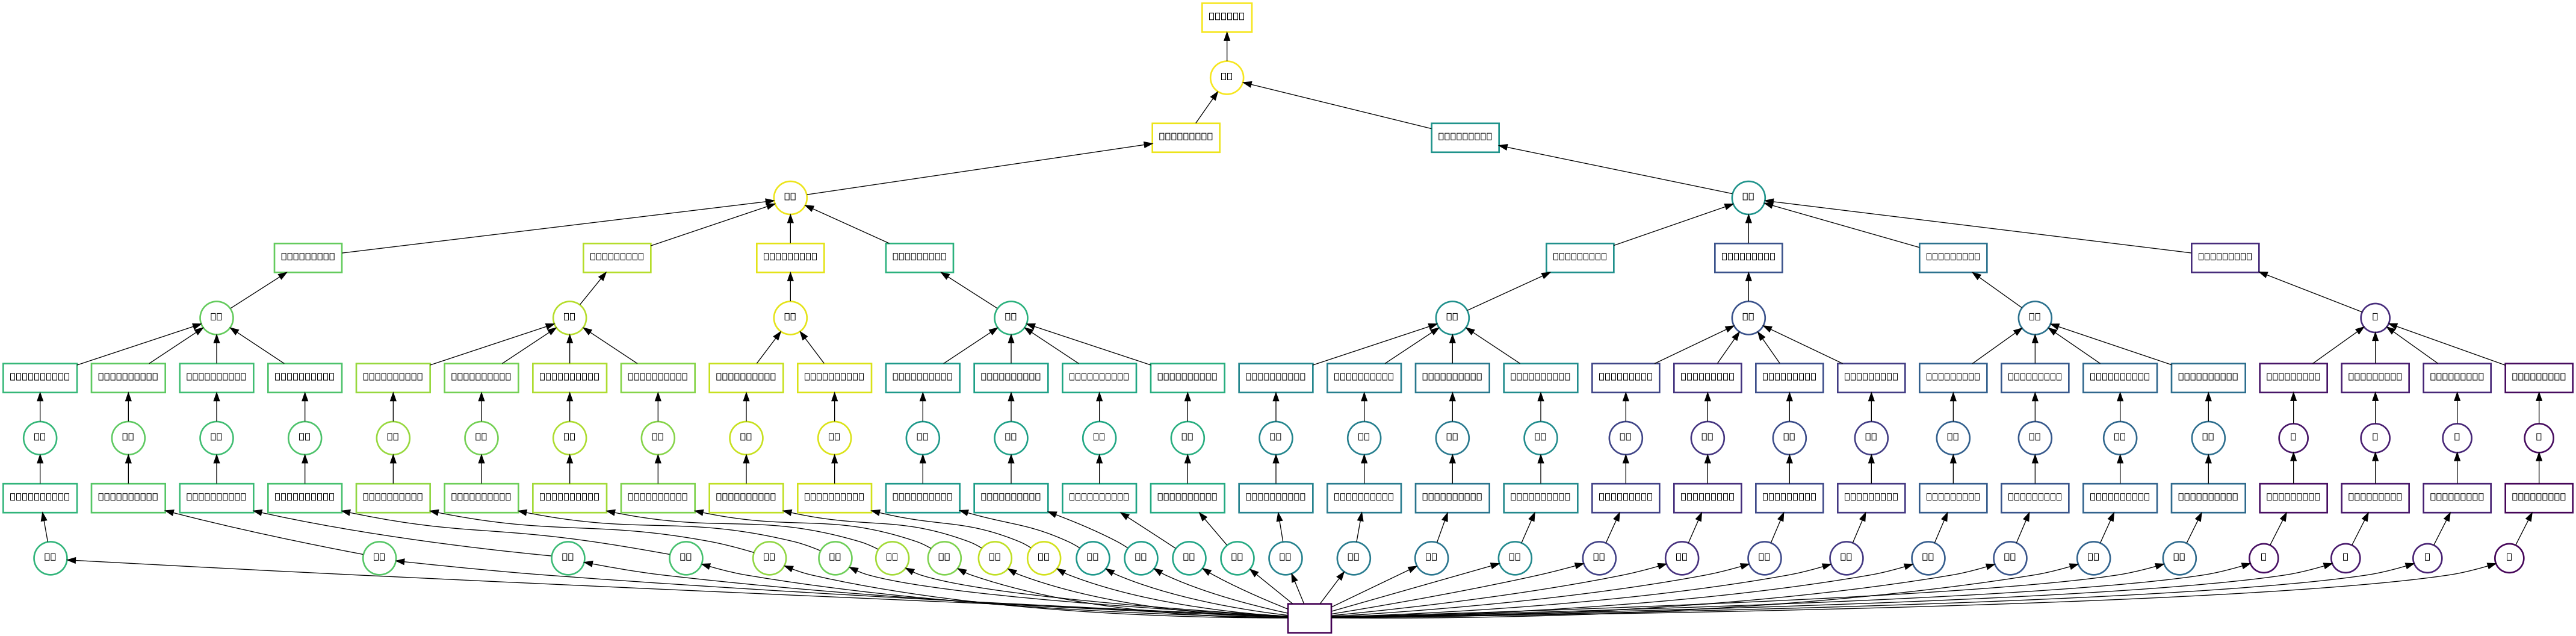

In [9]:
mean_sst = ds.sosstsst.mean(dim="time_counter")
mean_sst.data.visualize(optimize_graph=True, color="order",
                 cmap="viridis", node_attr={"penwidth": "2"})

<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br />

In [10]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    mean_sst.compute()

[########################################] | 100% Completed | 10.2s


<img width="50%" style="float: right;" src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/5992/9387473/9354557/abern3-3059437-large.gif">

# Distributed Read Performance

- Compared OSN throughput to Google Cloud storage in _US-CENTRAL1_ 
- For modest levels of concurrent reads (< 50), **OSN was faster**
- Read throughput of **5 GB/s**
- Nearly 2 orders of magnitude faster than legacy data portal

# Computational Tools

- [Xmitgcm](https://xmitgcm.readthedocs.io/) - open MITgcm mds files with Xarray
- [Xgcm](http://xgcm.readthedocs.org/) - finite volume grid analysis for Xarray datasets
- [Xrft](https://xrft.readthedocs.io/en/latest/) - multidimensional spectral analysis for Xarray datasets
- [Xhistogram](https://xhistogram.readthedocs.io/) - fast, fancy binning for Xarray datasets

# Pangeo Forge

[Pangeo Forge](https://github.com/pangeo-forge/roadmap) is an open source tool for data Extraction, Transformation, and Loading (ETL). The goal of Pangeo Forge is to make it easy to extract data from traditional data repositories and deposit in cloud object storage in analysis-ready, cloud-optimized (ARCO) format.

<img width="70%" src="https://github.com/pangeo-forge/roadmap/raw/master/pangeo-forge-diagram.png">


# Conclusions

- The data-intensive nature of the SWOT mission is a perfect fit for the Pangeo mission
- We have made major strides in upgrading our infrastructure over the past few years
- Very fun an satisfying to work on tools / infrastructure, but academia doesn't provide much incentive
- Need to work with funding agencies around cloud infrastructure

<h3 style="align: center;"><img style="display: inline;" width="200px" src="https://raw.githubusercontent.com/pangeo-data/branding/master/logo/v_small_pangeo_logo.png"> ❤️ SWOT</h1>
